In [90]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [49]:
df = pd.read_csv("APR_Strategy_w._Randomized_Experimentation_CSV.csv")

In [89]:
df.head(20)

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
app_id,,,,,,
1,700,control,4.00%,False,NaN,NaN
2,700,test,3.00%,False,NaN,NaN
3,700,test,3.00%,False,NaN,NaN
4,700,control,4.00%,False,NaN,NaN
5,700,control,4.00%,True,1000.0,600.0
6,700,control,4.00%,False,NaN,NaN
7,700,test,3.00%,False,NaN,NaN
8,700,control,4.00%,False,NaN,NaN
9,700,control,4.00%,True,1000.0,600.0


In [50]:
df.shape

(20000, 7)

In [51]:
df.set_index(['app_id'], inplace=True)

## Carvana pricing: what’s the current APR pricing strategy for the different FICO buckets? 
APR is higher for lower credit customers. As seen in plot 1 Carvana has a lower number of 600 credit score customers at Higher APR’s.


In [53]:
apr_strategy = df.groupby(['apr','fico'])['converted to sale'].sum()
conv_percent = df.groupby(['fico'])['converted to sale'].sum()
total_customers = df['converted to sale'].sum()

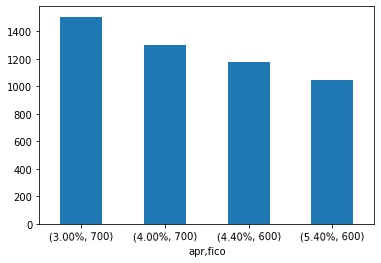

In [54]:
apr_strategy.plot(kind = 'bar', rot = True )

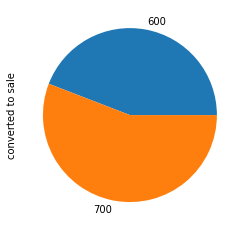

In [55]:
(conv_percent / total_customers).plot(kind= 'pie')

## How is the randomized test structured?
By nearly 50/50 split (10021 Control and 9979 in test) in control and test. The control has FICO 600 & 700 @ APR 5.4% and 4%. Test has FICO 600 & 700 @ 4.4% and 3%.
##  How do APR's vary by test group? 
The control has higher APR's overall 

In [56]:
rando_fico = df.groupby(['apr_test_group','fico']).sum()
sumCon = df[df['apr_test_group'] == 'control']
# rando_fico 
sumCon

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
app_id,,,,,,
1,700,control,4.00%,False,NaN,NaN
4,700,control,4.00%,False,NaN,NaN
5,700,control,4.00%,True,1000.0,600.0
6,700,control,4.00%,False,NaN,NaN
8,700,control,4.00%,False,NaN,NaN
...,...,...,...,...,...,...
19993,600,control,5.40%,True,1000.0,650.0
19994,600,control,5.40%,False,NaN,NaN
19995,600,control,5.40%,True,1000.0,650.0


In [57]:
rando_apr = df.groupby(['apr_test_group','fico','apr']).sum()

rando_apr

converted to sale  vehicle margin  finance margin
apr_test_group fico apr                                                     
control        600  5.40%             1044.0       1044000.0        678600.0
               700  4.00%             1300.0       1300000.0        780000.0
test           600  4.40%             1172.0       1172000.0        468800.0
               700  3.00%             1505.0       1505000.0        526750.0

In [58]:
#APR Pricing strategy for different FICO buckets

apr_fico = df.groupby(['apr','fico']).sum()
tot_sales = apr_fico['converted to sale'].sum()

In [59]:
apr_fico['% of Sales'] = apr_fico['converted to sale'] / tot_sales


In [60]:
apr_fico = apr_fico[['% of Sales'] + [col for col in apr_fico.columns if col != '% of Sales']]

In [61]:
# apr_fico.insert(1, apr_fico.pop(apr_fico('% of Sales')))

apr_fico['% vehicle margin'] = apr_fico['vehicle margin']/ apr_fico['vehicle margin'].sum()

In [62]:
apr_fico = apr_fico[ [col for col in apr_fico.columns if col != 'vehicle margin'] + ['vehicle margin']]

In [63]:
apr_fico['% finance margin'] = apr_fico['finance margin'] / apr_fico['finance margin'].sum()
apr_fico = apr_fico[ [col for col in apr_fico.columns if col != 'finance margin'] + ['finance margin']]

In [64]:
tot_sales/ df.shape[0]

0.25105

In [65]:
apr_fico

,,% of Sales,converted to sale,% vehicle margin,vehicle margin,% finance margin,finance margin
apr,fico,,,,,,
3.00%,700,0.299741,1505.0,0.299741,1505000.0,0.214636,526750.0
4.00%,700,0.258913,1300.0,0.258913,1300000.0,0.317829,780000.0
4.40%,600,0.233420,1172.0,0.233420,1172000.0,0.191023,468800.0
5.40%,600,0.207927,1044.0,0.207927,1044000.0,0.276511,678600.0


In [66]:
purch_df = df[df['converted to sale'] == True]

test = purch_df[purch_df['apr_test_group'] == 'test']

test['apr'].sort_values().unique()

array(['3.00%', '4.40%'], dtype=object)

In [67]:
control = purch_df[purch_df['apr_test_group'] == 'control']

control['apr'].sort_values().unique()

array(['4.00%', '5.40%'], dtype=object)

## Customer conversion rate: in general, how many applications is Carvana able to convert to a sale? 
~ Approximately 25.11% >>>>>>> tot_sales/ df.shape[0]

## How does that vary by FICO?

Number of applications Converted to sale is correlated with lower APR and Higher FICO. % of sales is increasing as FICO rises and inversely related to higher APR. This makes logical sense. See apr_fico table above 

## Using the APR test group data, how does the APR affect conversion?

APR in the Test Group has a higher conversion rate than in the control group b/c of lower APR rates overall. As APR increases conversion rates decrease on a % basis. 

In [80]:
print((1172/1044), (1505/1300))

1.1226053639846743 1.1576923076923078


In [69]:
rando_apr = df.groupby(['apr_test_group','fico', 'apr']).sum()

rando_apr

converted to sale  vehicle margin  finance margin
apr_test_group fico apr                                                     
control        600  5.40%             1044.0       1044000.0        678600.0
               700  4.00%             1300.0       1300000.0        780000.0
test           600  4.40%             1172.0       1172000.0        468800.0
               700  3.00%             1505.0       1505000.0        526750.0

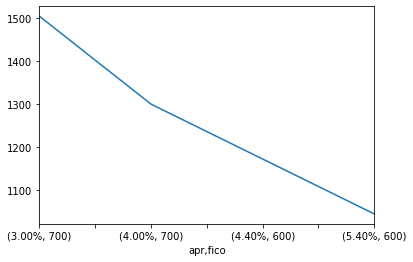

In [70]:
apr_fico['converted to sale'].plot(kind='line')

## Carvana margin: what does Carvana make in margin overall (vehicle + financing), per sale and per application?
      
See table below Revenue per application and Revenue per vehicle. 
    
## How does APR affect the finance margin per sale?

Single>>> with APR being only independent variable > R squared hovering just above 50% which does not fully explain the variance in % finance margin. Significant T stat. low SE and high F test.

Multi>> for a 1% change in APR an 11.24% increase in % Finance Margin is expected. High F test, High t stat. Low SE and no autocorrelation. DW =2.02. However, independent variable exhibit multicollinearity. 


## How does FICO affect the finance margin per sale?

 
See Linear Regression below~~ In theory we would have more variation of FICO scores. I ran a single variable regression and multivariate regression. 

Single>> LOW R squared. Indicates as suspected FICO data points (600,700) are hard to fit on a regression line to predict % finance margin. This single variable is a poor predictor of margin. 

MultiVariate>> for every 1 point increase in fico, % finance margin increases by .13% This result is questionable given our range of fico scores was only 2 possible entries. However, the multivariate model better explained the total variation in % finance model when it included fico than the single LR model as indicated by higher R squared of .99!  THis is likely evidence of multicollinearity. 


In [82]:
apr_fico['total Revenue'] = apr_fico['vehicle margin'] + apr_fico['finance margin']

apr_fico['Revenue Per Vehicle'] = apr_fico['total Revenue'] / apr_fico['converted to sale']

apr_fico['Revenue Per Application'] = apr_fico['total Revenue'] / df.shape[0]

In [83]:
apr_fico

,,% of Sales,converted to sale,% vehicle margin,vehicle margin,% finance margin,finance margin,total Revenue,Revenue Per Vehicle,Revenue Per Application
apr,fico,,,,,,,,,
3.00%,700,0.299741,1505.0,0.299741,1505000.0,0.214636,526750.0,2031750.0,1350.0,101.5875
4.00%,700,0.258913,1300.0,0.258913,1300000.0,0.317829,780000.0,2080000.0,1600.0,104.0000
4.40%,600,0.233420,1172.0,0.233420,1172000.0,0.191023,468800.0,1640800.0,1400.0,82.0400
5.40%,600,0.207927,1044.0,0.207927,1044000.0,0.276511,678600.0,1722600.0,1650.0,86.1300


In [230]:
conversion = apr_fico[['% of Sales', 'converted to sale', '% vehicle margin', 'vehicle margin']]

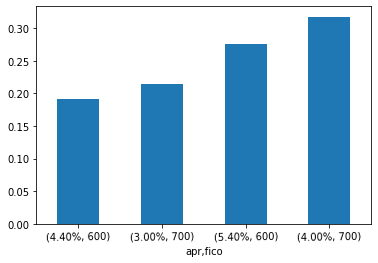

In [139]:
## Finance Margin % Plot

apr_fico['% finance margin'].sort_values().plot(kind='bar',rot = True)

In [85]:
apr_fico['% finance margin'].sort_values()

apr    fico
4.40%  600     0.191023
3.00%  700     0.214636
5.40%  600     0.276511
4.00%  700     0.317829
Name: % finance margin, dtype: float64

In [91]:
df.head()

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
app_id,,,,,,
1,700,control,4.00%,False,NaN,NaN
2,700,test,3.00%,False,NaN,NaN
3,700,test,3.00%,False,NaN,NaN
4,700,control,4.00%,False,NaN,NaN
5,700,control,4.00%,True,1000.0,600.0


In [103]:
df.dropna(inplace=True)

In [104]:
df.head()

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
app_id,,,,,,
5,700,control,4.00%,True,1000.0,600.0
9,700,control,4.00%,True,1000.0,600.0
11,700,test,3.00%,True,1000.0,350.0
12,700,control,4.00%,True,1000.0,600.0
15,700,test,3.00%,True,1000.0,350.0


In [121]:
df.columns

Index(['fico', 'apr_test_group', 'apr', 'converted to sale', 'vehicle margin',
       'finance margin'],
      dtype='object')

In [122]:
colstocheck = df.columns

df[colstocheck] = df[colstocheck].replace({'%':''}, regex = True)

In [179]:
df['total margin'] = df['vehicle margin'] + df['finance margin']
df['% finance margin'] = df['finance margin'] / df['total margin']

df['% finance margin'] = df['% finance margin'].apply(lambda x: x * (100))

In [181]:
target = pd.DataFrame(df['% finance margin'])
df

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin,total margin,% finance margin
app_id,,,,,,,,
5,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500000
9,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500000
11,700.0,test,3.0,True,1000.0,350.0,1350.0,25.925926
12,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500000
15,700.0,test,3.0,True,1000.0,350.0,1350.0,25.925926
...,...,...,...,...,...,...,...,...
19981,600.0,test,4.4,True,1000.0,400.0,1400.0,28.571429
19992,600.0,control,5.4,True,1000.0,650.0,1650.0,39.393939
19993,600.0,control,5.4,True,1000.0,650.0,1650.0,39.393939


In [182]:
b = df['fico']

b = b.astype('float64')

In [183]:
a = df['apr']
a = a.astype('float64')
a

app_id
5        4.0
9        4.0
11       3.0
12       4.0
15       3.0
        ... 
19981    4.4
19992    5.4
19993    5.4
19995    5.4
19996    4.4
Name: apr, Length: 5021, dtype: float64

In [184]:
df['apr'] = a
df['fico'] = b
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5021 entries, 5 to 19996
Data columns (total 8 columns):
fico                 5021 non-null float64
apr_test_group       5021 non-null object
apr                  5021 non-null float64
converted to sale    5021 non-null bool
vehicle margin       5021 non-null float64
finance margin       5021 non-null float64
total margin         5021 non-null float64
% finance margin     5021 non-null float64
dtypes: bool(1), float64(6), object(1)
memory usage: 318.7+ KB


In [185]:


target['% finance margin']

app_id
5        37.500000
9        37.500000
11       25.925926
12       37.500000
15       25.925926
           ...    
19981    28.571429
19992    39.393939
19993    39.393939
19995    39.393939
19996    28.571429
Name: % finance margin, Length: 5021, dtype: float64

## Single Variable Regression APR

In [198]:
X = df['apr']
X = sm.add_constant(X)
y = target['% finance margin']

model = sm.OLS(y,X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % finance margin   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5929.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:45:52   Log-Likelihood:                -13936.
No. Observations:                5021   AIC:                         2.788e+04
Df Residuals:                    5019   BIC:                         2.789e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2669      0.266     46.047      0.000      11.745      12.789
apr            4.9143      0.064     76.999      0.000       4.789       5.039
==============================================================================
Omnibus:                     1764.428   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.680
Skew:                           0.161   Prob(JB):                     5.53e-58
Kurtosis:                       1.925   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Single Variable Regression FICO 

In [197]:
X = df['fico']
X = sm.add_constant(X)
y = target['% finance margin']

model = sm.OLS(y,X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % finance margin   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     222.6
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.73e-49
Time:                        13:44:20   Log-Likelihood:                -15785.
No. Observations:                5021   AIC:                         3.157e+04
Df Residuals:                    5019   BIC:                         3.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.9507      1.049     45.701      0.000      45.894      50.008
fico          -0.0238      0.002    -14.920      0.000      -0.027      -0.021
==============================================================================
Omnibus:                    17692.419   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.085
Skew:                           0.135   Prob(JB):                    1.25e-181
Kurtosis:                       1.023   Cond. No.                     8.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## MultiVariate Regression with APR & FICO with Constant

In [194]:
X = df[['apr','fico']]
X = sm.add_constant(X)
y = target['% finance margin']

model = sm.OLS(y,X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       % finance margin   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.377e+06
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:21:37   Log-Likelihood:                 1315.5
No. Observations:                5021   AIC:                            -2625.
Df Residuals:                    5018   BIC:                            -2605.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.7600      0.078  -1299.132      0.000    -101.914    -101.606
apr           11.2420      0.005   2133.690      0.000      11.232      11.252
fico           0.1344   9.11e-05   1475.499      0.000       0.134       0.135
==============================================================================
Omnibus:                    18224.573   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.614
Skew:                          -0.015   Prob(JB):                    1.39e-169
Kurtosis:                       1.072   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using your understanding of conversion and total margin (across all applications) and how APR affects the two, if Carvana wants to optimize total margin, do you think Carvana should raise or lower rates on 700 FICO customers?

Given the higher total revenue, finance margin and revenue per vehicle for FICO 700 customers @ 4% APR relative to 3%. APR should be raised to maximize Revenue per application. It also maximizes % finance margin overall bc conversion is ~ 25% higher of 700 vs 600 customers. 

## What about 600 FICO customers?

Raise rates on them as well. Revenue per application will rise as seen in the table apr_fico below. Total Revenue is higher in 5.4% APR vs 4.4% APR with lower overall car sales. Revenue per vehicle and finance margins are higher and thus rates should be raised. 

In [223]:
df['% finance margin'] = df['finance margin'].apply(lambda x: x / (df['total margin']))
# df['% finance margin'] = df['finance margin'].apply(lambda x: x / 100)



In [240]:
conversion

,,% of Sales,converted to sale,% vehicle margin,vehicle margin,sumSales
apr,fico,,,,,
3.00%,700,0.299741,1505.0,0.299741,1505000.0,5021000.0
4.00%,700,0.258913,1300.0,0.258913,1300000.0,5021000.0
4.40%,600,0.233420,1172.0,0.233420,1172000.0,5021000.0
5.40%,600,0.207927,1044.0,0.207927,1044000.0,5021000.0


In [243]:
apr_fico['finance margin/vehicle'] = apr_fico['finance margin']/ apr_fico['converted to sale']
apr_fico['REVENUE PER APPLICATION'] = apr_fico['Revenue Per Application']

In [244]:
apr_fico

,,% of Sales,converted to sale,% vehicle margin,vehicle margin,% finance margin,finance margin,total Revenue,Revenue Per Vehicle,Revenue Per Application,finance margin/vehicle,REVENUE PER APPLICATION
apr,fico,,,,,,,,,,,
3.00%,700,0.299741,1505.0,0.299741,1505000.0,0.214636,526750.0,2031750.0,1350.0,101.5875,350.0,101.5875
4.00%,700,0.258913,1300.0,0.258913,1300000.0,0.317829,780000.0,2080000.0,1600.0,104.0000,600.0,104.0000
4.40%,600,0.233420,1172.0,0.233420,1172000.0,0.191023,468800.0,1640800.0,1400.0,82.0400,400.0,82.0400
5.40%,600,0.207927,1044.0,0.207927,1044000.0,0.276511,678600.0,1722600.0,1650.0,86.1300,650.0,86.1300


In [225]:
df['% finance margin'] = df['% finance margin'].apply(lambda x: x * (100))

In [249]:
df['rev per purchase'] = df['total margin']/df.shape[0] 

In [250]:
df

,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin,total margin,% finance margin,rev per purchase
app_id,,,,,,,,,
5,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500,0.318662
9,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500,0.318662
11,700.0,test,3.0,True,1000.0,350.0,1350.0,21.875,0.268871
12,700.0,control,4.0,True,1000.0,600.0,1600.0,37.500,0.318662
15,700.0,test,3.0,True,1000.0,350.0,1350.0,21.875,0.268871
...,...,...,...,...,...,...,...,...,...
19981,600.0,test,4.4,True,1000.0,400.0,1400.0,25.000,0.278829
19992,600.0,control,5.4,True,1000.0,650.0,1650.0,40.625,0.328620
19993,600.0,control,5.4,True,1000.0,650.0,1650.0,40.625,0.328620


## % APR as a function of Revenue per Purchase 

In [251]:
X = df['apr']
X = sm.add_constant(X)
y = df['rev per purchase']

model = sm.OLS(y,X).fit()
predictions = model.predict(X) # make the predictions by the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rev per purchase   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     5851.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:30:05   Log-Likelihood:                 13265.
No. Observations:                5021   AIC:                        -2.653e+04
Df Residuals:                    5019   BIC:                        -2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2080      0.001    175.889      0.000       0.206       0.210
apr            0.0217      0.000     76.492      0.000       0.021       0.022
==============================================================================
Omnibus:                     1709.332   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.976
Skew:                           0.024   Prob(JB):                     4.71e-53
Kurtosis:                       1.928   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.Other than these cut and dry numbers, can you think of other factors Carvana might want to take into account before changing rates? 

Well primarily other competitors rates would be the first place I would check to make sure our rates are competitive. 
The term of the auto loan would be a good place to look as well. Shorter duration = higher rates most of the time. I would like the see the structure of the auto loan payments, are we spread out over time in a laddered manner or do we have a high % of (ex: 2-3 year maturities relative to our overall portfolio). 

There are numerous other quantitative and qualitative consumer variables(education level, job currently held, checking account balances using plaid, consumer spending patterns) I would like to go over as well as macro economic indicators (subprime auto Defaults, credit card delinquencies, unemployment filings). 

All these would help be better understand and measure how healthy the end customer is, how well we can securitize our loans and how other competitors are viewing the environment given their knowledge for consumer's debt appetite.

With treasury yields on a downward trajectory, this is probably the major consideration as elected officials seemingly expect intervention in credit markets. The current credit bubble has room to go as more cheap debt is printed. The question becomes not if but when defaults start to uptick or whether inflation creeps up. 